 # Run OLS and RF models
  1. Is a good a idea consider the variables with more correlation. 
  2. I add all the variables beacuse I don't have enough knowledge of the variables. 
  3. The code is ajusted to run the model with the variable that you want (applies for RF).

## First, run a lineal model of the variables


In [26]:
import pandas as pd
import statsmodels.api as sm
from openpyxl import Workbook
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

# Leer los DataFrames
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',').dropna()
data_frame_combinado_dep = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',').dropna()

# Verificar las columnas de cada DataFrame
print("Variables Independientes:\n", data_frame_combinado_indep.columns)
print("Variables Dependientes:\n", data_frame_combinado_dep.columns)

Variables Independientes:
 Index(['id', 'OutDeg_RedConfltAgu', 'Degree_RedConfliAgu',
       'Degree_RedeIrmonsPr', 'OutDeg_PaiTiopaterC', 'OutDeg_TiosMaternos',
       'Degree_IntimAmigUnd', 'OutDeg_IntimAmigos_', 'OutDeg_RedeRisk_Cen',
       'OutDeg_RedeConfianc', 'Degree_RedeConflitA', 'Degree_RedeConflitG',
       'OutDeg_VendaParcela', 'OutDeg_EmprestParce', 'PC1_Distance_Pro',
       'PC2_Distance_Pro', 'Avg_Distancia_Dist_moranza', 'Degree_RedeTotFamil',
       '1_VarExp_Moranca', '2_VarExp_Atri_Tabanca', '3_VarExp_Atri_Fanado',
       '4_VarExp_Atri_CargosWM', '5_VarExp_Atri_Idade',
       '6_VarExp_Atri_ClassIdade', '7_VarExp_Atri_IndForcaFugon',
       '8_VarExp_Atri_IndInvestDiq', '9_VarExp_Atri_IndMelhorTecnDiqCint',
       '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha'],
      dtype='object')
Variables Dependientes:
 Index(['id', 'Degree_Rede_EntreajudaLabur',
       'Indeg_Var.Dep_RedeControlExtAusencia',
       'Indeg_Var.Dep_ApoioSpecDiqCint', 'Indeg_Var.Dep_ApoioSpe

In [27]:

from sklearn.preprocessing import LabelEncoder
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Aplicar LabelEncoder a cada columna en la lista
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])



In [28]:
data_frame_combinado_dep

,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Antonio Mbunh,12,1,2,2,0,2,2,0,4,4,0
1,Bulna Ntumba,12,3,1,1,0,3,3,6,7,7,0
2,Nghala Pungana,12,1,1,1,2,3,1,2,4,4,0
3,Samba Ndum,12,1,1,2,4,9,9,18,18,18,0
4,Tomas Isnaba,12,2,2,3,3,4,4,5,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Bedamatcha Ayatche,19,3,0,0,0,4,4,0,8,8,0
125,Nfensande Sumba,19,0,1,0,0,2,1,0,3,3,0
126,Nsumba Ance,19,1,1,1,0,0,0,0,0,0,0
127,Rufna Cabi,19,2,1,1,0,2,1,0,3,3,0


In [29]:
data_frame_combinado_indep

,id,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,Antonio Mbunh,1,1,0,0,0,5,2,2,1,...,2,1,0,38,2,1.0,4,9,0,1.9217
1,Bulna Ntumba,0,0,0,4,0,1,1,4,1,...,2,1,0,66,3,2.0,4,0,0,1.8387
2,Nghala Pungana,0,0,4,0,0,3,2,2,1,...,2,1,0,57,2,1.0,2,1,0,1.6564
3,Samba Ndum,0,0,4,0,0,9,8,5,4,...,2,0,0,52,2,1.0,5,5,0,2.6717
4,Tomas Isnaba,0,0,4,0,0,8,3,6,3,...,2,0,0,50,2,1.0,5,19,2,2.2281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Bedamatcha Ayatche,0,0,0,0,0,17,13,0,4,...,1,1,0,39,2,1.0,4,5,1,0.3036
125,Nfensande Sumba,0,0,2,0,0,4,2,0,1,...,1,1,0,53,2,2.0,2,1,0,0.1771
126,Nsumba Ance,0,0,0,0,0,4,4,0,1,...,1,1,0,35,1,1.0,3,0,0,0.7046
127,Rufna Cabi,0,0,2,0,0,3,0,0,2,...,1,0,0,46,2,2.0,3,2,1,0.9873


In [30]:
variables = ['id',    'OutDeg_RedConfltAgu',
    'Degree_RedConfliAgu',
    'Degree_RedeIrmonsPr',
    'OutDeg_PaiTiopaterC',
    'OutDeg_TiosMaternos',
    'Degree_IntimAmigUnd',
    'OutDeg_IntimAmigos_',
    'OutDeg_RedeRisk_Cen',
    'OutDeg_RedeConfianc',
    'Degree_RedeConflitA',
    'Degree_RedeConflitG',
    'OutDeg_VendaParcela',
    'OutDeg_EmprestParce',
    'PC1_Distance_Pro',
    'PC2_Distance_Pro',
    'Avg_Distancia_Dist_moranza',
    'Degree_RedeTotFamil',
    '1_VarExp_Moranca',
    '2_VarExp_Atri_Tabanca',
    '3_VarExp_Atri_Fanado',
    '4_VarExp_Atri_CargosWM',
    '5_VarExp_Atri_Idade',
    '6_VarExp_Atri_ClassIdade',
    '7_VarExp_Atri_IndForcaFugon',
    '8_VarExp_Atri_IndInvestDiq',
    '9_VarExp_Atri_IndMelhorTecnDiqCint',
    '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

#variables = ['id',    'OutDeg_RedConfltAgu',
    # 'Degree_RedConfliAgu',
    # 'Degree_RedeIrmonsPr',
    # 'OutDeg_PaiTiopaterC',
    # 'OutDeg_TiosMaternos',
    # 'Degree_IntimAmigUnd',
    # 'OutDeg_IntimAmigos_',
    # 'OutDeg_RedeRisk_Cen',
    # 'OutDeg_RedeConfianc',
    # 'Degree_RedeConflitA',
    # 'Degree_RedeConflitG',
    # 'OutDeg_VendaParcela',
    # 'OutDeg_EmprestParce',
    # 'PC1_Distance_Pro',
    # 'PC2_Distance_Pro',
    # 'Avg_Distancia_Dist_moranza',
    # 'Degree_RedeTotFamil',
    # '1_VarExp_Moranca',
    # '2_VarExp_Atri_Tabanca',
    # '3_VarExp_Atri_Fanado',
    # '4_VarExp_Atri_CargosWM',
    # '5_VarExp_Atri_Idade',
    # '6_VarExp_Atri_ClassIdade',
    # '7_VarExp_Atri_IndForcaFugon',
    # '8_VarExp_Atri_IndInvestDiq',
    # '9_VarExp_Atri_IndMelhorTecnDiqCint',
    # '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

# variables = [
#     'id',
#     'Indeg_RedConfltAgu',
#     'Degree_RedConfliAgu',
#     'Degree_RedeIrmonsPr',
#     'Indeg_PaiTiopaterC',
#     'Indeg_TiosMaternos',
#     'Degree_IntimAmigUnd',
#     'Indeg_IntimAmigos_',
#     'Indeg_RedeRisk_Cen',
#     'Indeg_RedeConfianc',
#     'Degree_RedeConflitA',
#     'Degree_RedeConflitG',
#     'Indeg_VendaParcela',
#     'Indeg_EmprestParce',
#     'PC1_Distance_Pro',
#     'PC2_Distance_Pro',
#     'Avg_Distancia_Dist_moranza',
#     'Degree_RedeTotFamil',
#     '1_VarExp_Moranca',
#     '2_VarExp_Atri_Tabanca',
#     '3_VarExp_Atri_Fanado',
#     '4_VarExp_Atri_CargosWM',
#     '5_VarExp_Atri_Idade',
#     '6_VarExp_Atri_ClassIdade',
#     '7_VarExp_Atri_IndForcaFugon',
#     '8_VarExp_Atri_IndInvestDiq',
#     '9_VarExp_Atri_IndMelhorTecnDiqCint',
#     '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

In [31]:
filtered_indep_vars = data_frame_combinado_indep[variables]
filtered_dep_vars = data_frame_combinado_dep

filtered_indep_vars


,id,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,Antonio Mbunh,1,1,0,0,0,5,2,2,1,...,2,1,0,38,2,1.0,4,9,0,1.9217
1,Bulna Ntumba,0,0,0,4,0,1,1,4,1,...,2,1,0,66,3,2.0,4,0,0,1.8387
2,Nghala Pungana,0,0,4,0,0,3,2,2,1,...,2,1,0,57,2,1.0,2,1,0,1.6564
3,Samba Ndum,0,0,4,0,0,9,8,5,4,...,2,0,0,52,2,1.0,5,5,0,2.6717
4,Tomas Isnaba,0,0,4,0,0,8,3,6,3,...,2,0,0,50,2,1.0,5,19,2,2.2281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Bedamatcha Ayatche,0,0,0,0,0,17,13,0,4,...,1,1,0,39,2,1.0,4,5,1,0.3036
125,Nfensande Sumba,0,0,2,0,0,4,2,0,1,...,1,1,0,53,2,2.0,2,1,0,0.1771
126,Nsumba Ance,0,0,0,0,0,4,4,0,1,...,1,1,0,35,1,1.0,3,0,0,0.7046
127,Rufna Cabi,0,0,2,0,0,3,0,0,2,...,1,0,0,46,2,2.0,3,2,1,0.9873


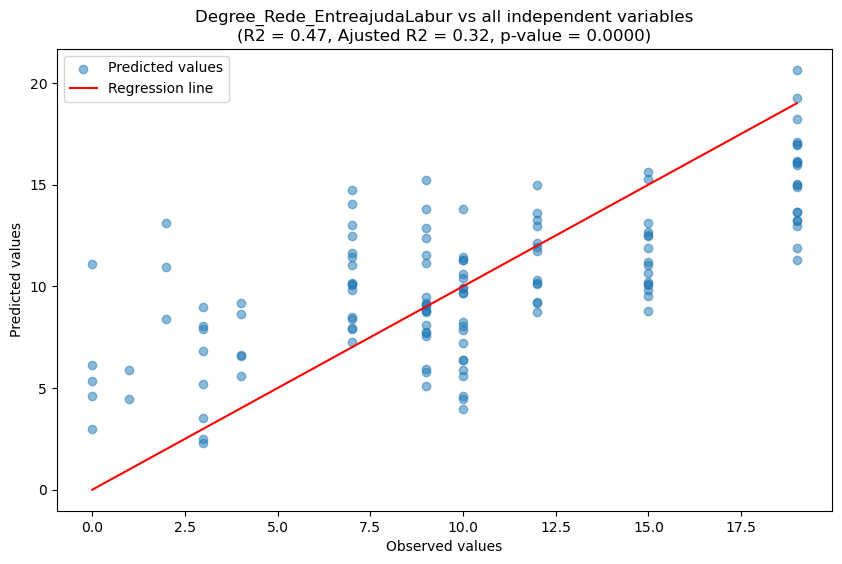

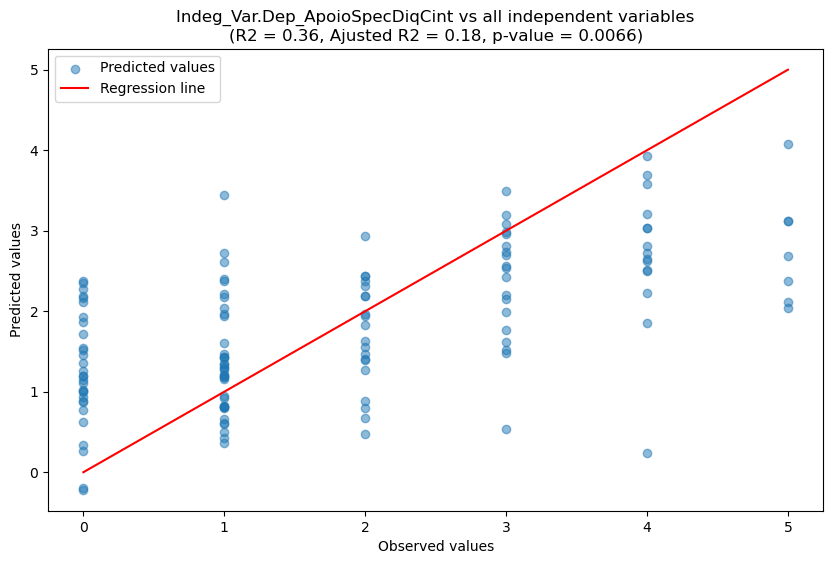

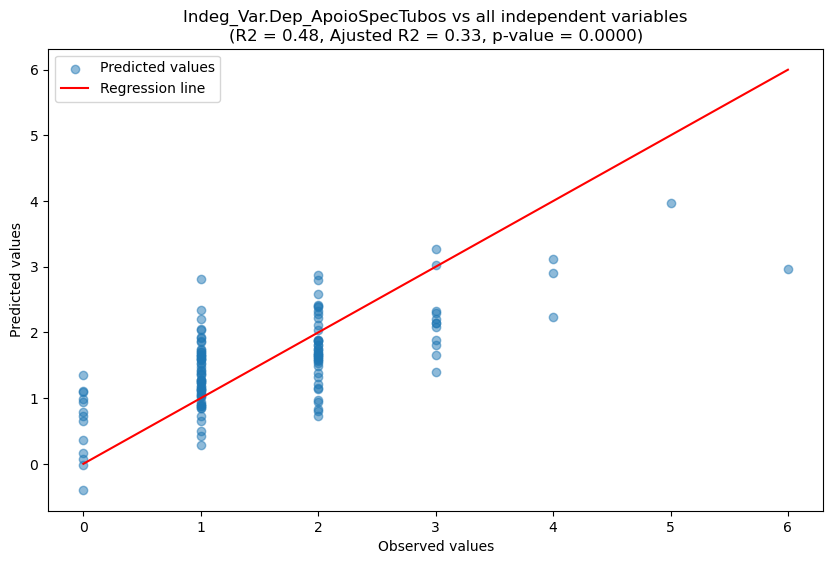

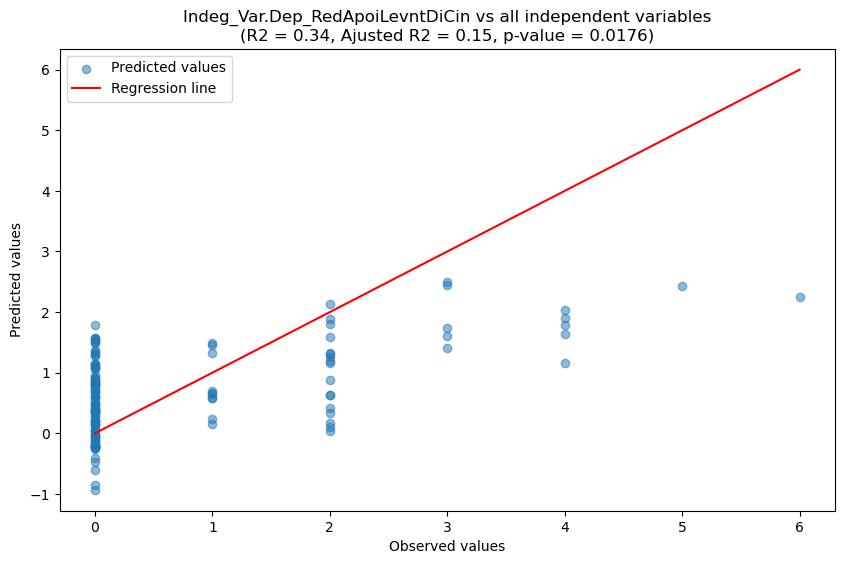

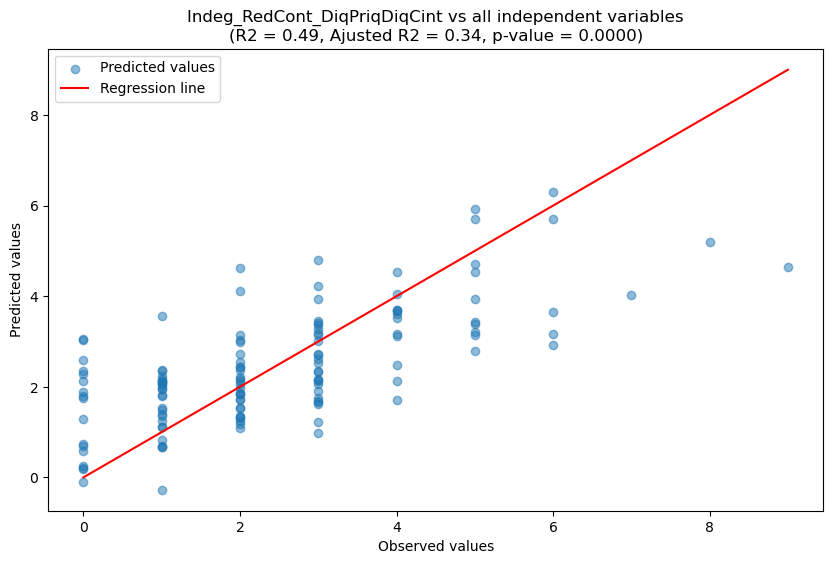

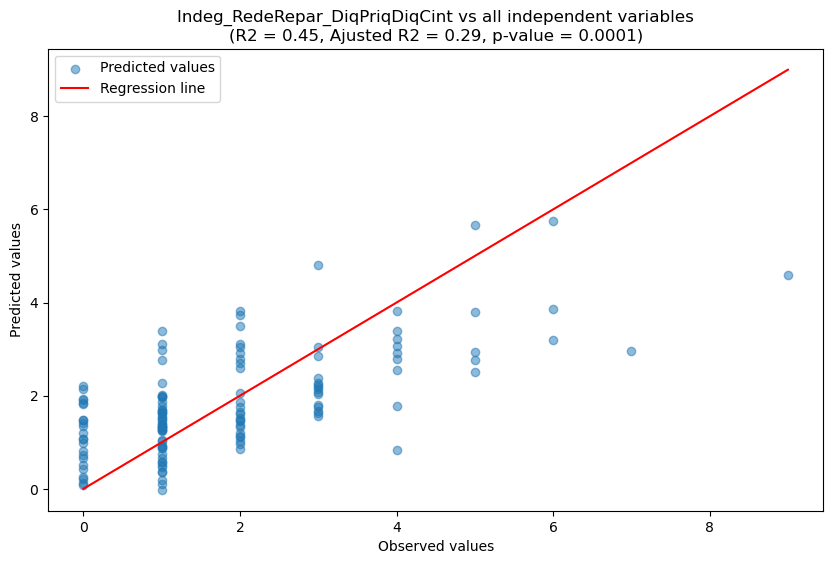

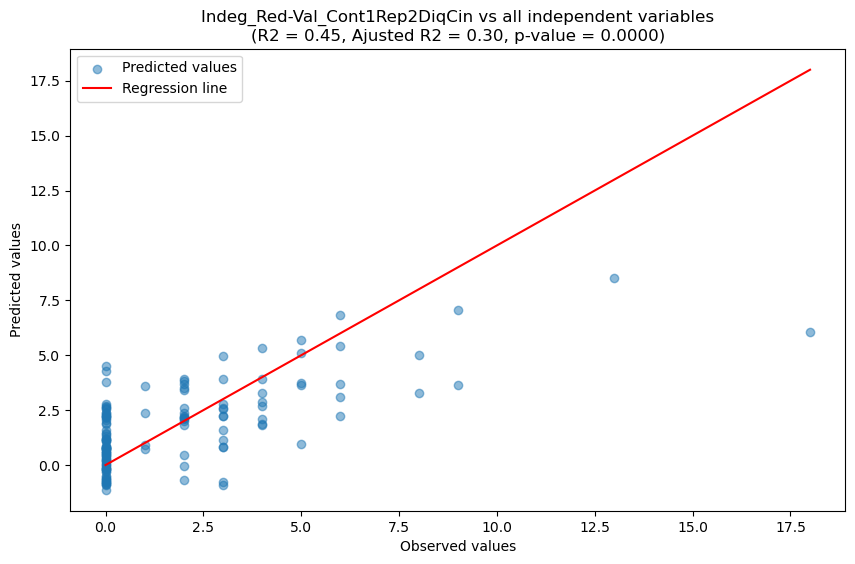

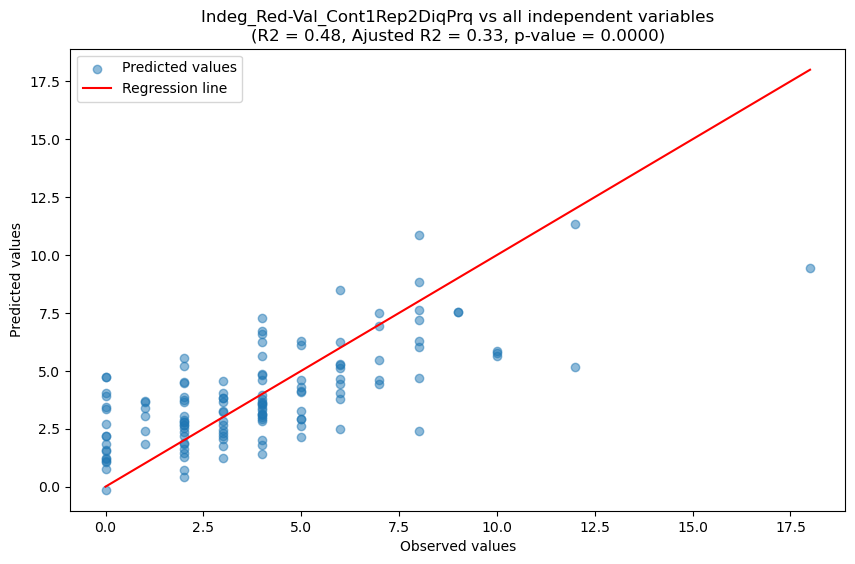

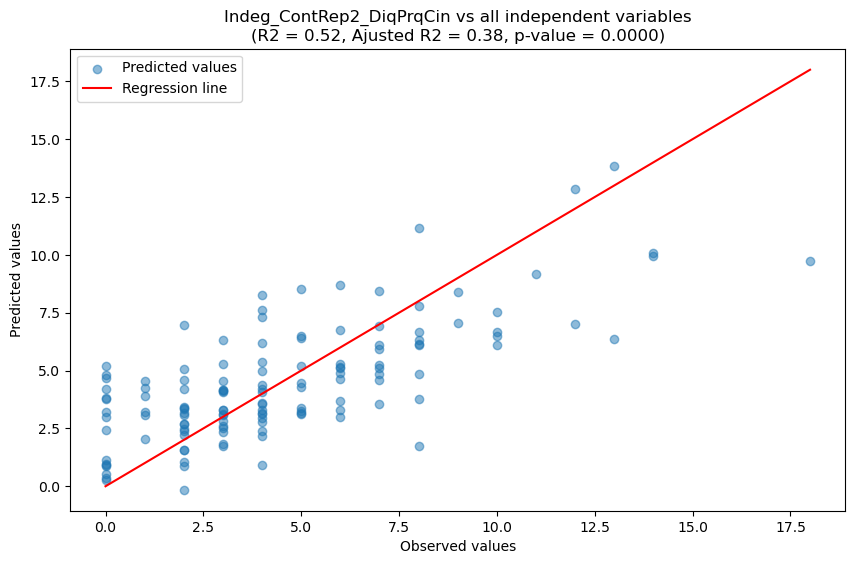

In [32]:

# Asegurarse de que la columna 'id' esté presente si fue eliminada
if 'id' in data_frame_combinado_indep.columns and 'id' not in filtered_indep_vars.columns:
    filtered_indep_vars['id'] = data_frame_combinado_indep['id']

if 'id' in data_frame_combinado_dep.columns and 'id' not in filtered_dep_vars.columns:
    filtered_dep_vars['id'] = data_frame_combinado_dep['id']

# Seleccionar todas las variables independientes
independent_vars = filtered_indep_vars.drop(columns=['id'])

# Añadir una constante (intercepto) al modelo
X = sm.add_constant(independent_vars)

# Diccionarios para almacenar los resultados
r2_scores = {} #coef regression
adjusted_r2_scores = {} #coef reg ajustado
p_values = {}

# Iterar sobre cada variable dependiente filtrada
for dependent_var in filtered_dep_vars.columns:
    if dependent_var != 'id':
        y = filtered_dep_vars[dependent_var]
        
        # Realizar la regresión OLS
        model = sm.OLS(y, X).fit()
        
        # Verificar si el R2 ajustado es válido
        if model.rsquared_adj != float('-inf') and not pd.isna(model.rsquared_adj):
            # Almacenar el R2, R2 ajustado y los p-values
            r2_scores[dependent_var] = model.rsquared
            adjusted_r2_scores[dependent_var] = model.rsquared_adj
            p_values[dependent_var] = model.pvalues

# Convertir los diccionarios a dataframes
r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Variable Dependiente', 'R2'])
adjusted_r2_df = pd.DataFrame(list(adjusted_r2_scores.items()), columns=['Variable Dependiente', 'R2 Ajustado'])
p_values_df = pd.DataFrame(p_values).transpose()
p_values_df.reset_index(inplace=True)
p_values_df.columns = ['Variable Dependiente'] + list(p_values_df.columns[1:])

regression_value = 0.10

# Filtrar las variables con R2 ajustado superior a 'regression_value'
filtered_r2_df = adjusted_r2_df[adjusted_r2_df['R2 Ajustado'] > regression_value]

# Crear un directorio para guardar los gráficos
os.makedirs('../DataIntermediate/regression_plots', exist_ok=True)

# Generar scatter plots para las regresiones con R2 Ajustado > 'regression_value'
for dependent_var in filtered_r2_df['Variable Dependiente']:
    y = filtered_dep_vars[dependent_var]
    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5, label='Predicted values')
    
    # Añadir línea de regresión
    min_y = min(y)
    max_y = max(y)
    plt.plot([min_y, max_y], [min_y, max_y], color='red', label='Regression line')  # Línea de regresión
    
    plt.title(f'{dependent_var} vs all independent variables\n(R2 = {model.rsquared:.2f}, Ajusted R2 = {model.rsquared_adj:.2f}, p-value = {model.f_pvalue:.4f})')
    plt.xlabel('Observed values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.grid(False)
    # plt.savefig(f'../DataIntermediate/regression_plots/regresion_{dependent_var}.png')  # Guardar los plots
    plt.show()

# Crear un nuevo libro de trabajo de Excel
wb = Workbook()

# Hoja para R2
ws_r2 = wb.active
ws_r2.title = "R2"
for idx, row in r2_df.iterrows():
    ws_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_r2.cell(row=idx + 1, column=2, value=row['R2'])

# Hoja para R2 Ajustado
ws_adjusted_r2 = wb.create_sheet(title="R2 Ajustado")
for idx, row in adjusted_r2_df.iterrows():
    ws_adjusted_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_adjusted_r2.cell(row=idx + 1, column=2, value=row['R2 Ajustado'])

# Hoja para p-values
ws_pvalues = wb.create_sheet(title="P-Values")
for idx, row in p_values_df.iterrows():
    for col_idx, value in enumerate(row):
        ws_pvalues.cell(row=idx + 1, column=col_idx + 1, value=value)

# Hoja para las regresiones con R2 Ajustado > 0.30
ws_filtered_r2 = wb.create_sheet(title=f"Regresiones con R2 > {regression_value}")
for idx, row in filtered_r2_df.iterrows():
    ws_filtered_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_filtered_r2.cell(row=idx + 1, column=2, value=row['R2 Ajustado'])

# Guardar el archivo Excel
wb.save('../Results/resultados_regresiones_ols.xlsx')


In [33]:
r2_df.head(10) #entre parenthèses: num de var à afficher

,Variable Dependiente,R2
0,Degree_Rede_EntreajudaLabur,0.465631
1,Indeg_Var.Dep_RedeControlExtAusencia,0.280917
2,Indeg_Var.Dep_ApoioSpecDiqCint,0.359141
3,Indeg_Var.Dep_ApoioSpecTubos,0.477763
4,Indeg_Var.Dep_RedApoiLevntDiCin,0.335860
5,Indeg_RedCont_DiqPriqDiqCint,0.486114
6,Indeg_RedeRepar_DiqPriqDiqCint,0.446071
7,Indeg_Red-Val_Cont1Rep2DiqCin,0.450900
8,Indeg_Red-Val_Cont1Rep2DiqPrq,0.480087
9,Indeg_ContRep2_DiqPrqCin,0.517962


## Run a RF model for each variable and obtain the importances and interactions between the variables. 

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from openpyxl import Workbook
import os

In [35]:
indep_variables_no_ceros = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',')
dep_variables_no_ceros= pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',')

dep_variables_no_ceros.head()

,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Antonio Mbunh,12,1,2,2,0,2,2,0,4,4,0
1,Bulna Ntumba,12,3,1,1,0,3,3,6,7,7,0
2,Nghala Pungana,12,1,1,1,2,3,1,2,4,4,0
3,Samba Ndum,12,1,1,2,4,9,9,18,18,18,0
4,Tomas Isnaba,12,2,2,3,3,4,4,5,8,8,1


In [36]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# List of columns to transform
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    indep_variables_no_ceros[col] = label_encoder.fit_transform(indep_variables_no_ceros[col])


### This is where you will filter the independent variables.
If you are going to eliminate variables for modeling, this is where you should do it.


In [37]:
variables = ['id',
    'OutDeg_RedConfltAgu',
    #'Degree_RedConfliAgu',
    #'Degree_RedeIrmonsPr',
    #'OutDeg_PaiTiopaterC',
    #'OutDeg_TiosMaternos',
    'Degree_IntimAmigUnd',
    'OutDeg_IntimAmigos_',
    'OutDeg_RedeRisk_Cen',
    'OutDeg_RedeConfianc',
    #'Degree_RedeConflitA',
    #'Degree_RedeConflitG',
    'OutDeg_VendaParcela',
    ###'OutDeg_EmprestParce',
    'PC1_Distance_Pro',
    #####'PC2_Distance_Pro',
    'Avg_Distancia_Dist_moranza',
    'Degree_RedeTotFamil',
    '1_VarExp_Moranca',
    '2_VarExp_Atri_Tabanca',
    ##'3_VarExp_Atri_Fanado',
    ##'4_VarExp_Atri_CargosWM',
    '5_VarExp_Atri_Idade',
    #'6_VarExp_Atri_ClassIdade',
    ###'7_VarExp_Atri_IndForcaFugon',
    '8_VarExp_Atri_IndInvestDiq',
    '9_VarExp_Atri_IndMelhorTecnDiqCint',
    '10_VarExp_Atri_MelhorTecnTubos', 
    'Area_bolanha']

#RAW
# variables = [
#     'id',
#     'Indeg_RedConfltAgu',
#     'Degree_IntimAmigUnd',
#     'Indeg_IntimAmigos_',
#     'Indeg_RedeRisk_Cen',
#     'Indeg_RedeConfianc',
#     'Degree_RedeConflitA',
#     'Degree_RedeConflitG',
#     'Indeg_VendaParcela',
#     'Indeg_EmprestParce',
#     'PC1_Distance_Pro',
#     'Avg_Distancia_Dist_moranza',
#     'Degree_RedeTotFamil',
#     '1_VarExp_Moranca',
#     '2_VarExp_Atri_Tabanca',
#     '3_VarExp_Atri_Fanado',
#     '4_VarExp_Atri_CargosWM',
#     '5_VarExp_Atri_Idade',
#     '7_VarExp_Atri_IndForcaFugon',
#     '8_VarExp_Atri_IndInvestDiq',
#     '9_VarExp_Atri_IndMelhorTecnDiqCint',
#     '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

#PRESELECT OUTDEG
#variables = ['id',    'OutDeg_RedConfltAgu',
    # 'Degree_IntimAmigUnd',
    # 'OutDeg_IntimAmigos_',
    # 'OutDeg_RedeRisk_Cen',
    # 'OutDeg_RedeConfianc',
    # 'Degree_RedeConflitA',
    # 'Degree_RedeConflitG',
    # 'OutDeg_VendaParcela',
    # 'OutDeg_EmprestParce',
    # 'PC1_Distance_Pro',
    # 'Avg_Distancia_Dist_moranza',
    # 'Degree_RedeTotFamil',
    # '1_VarExp_Moranca',
    # '2_VarExp_Atri_Tabanca',
    # '3_VarExp_Atri_Fanado',
    # '4_VarExp_Atri_CargosWM',
    # '5_VarExp_Atri_Idade',
    # '7_VarExp_Atri_IndForcaFugon',
    # '8_VarExp_Atri_IndInvestDiq',
    # '9_VarExp_Atri_IndMelhorTecnDiqCint',
    # '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

#RAW
#variables = ['id',    'OutDeg_RedConfltAgu',
    # 'Degree_RedConfliAgu',
    # 'Degree_RedeIrmonsPr',
    # 'OutDeg_PaiTiopaterC',
    # 'OutDeg_TiosMaternos',
    # 'Degree_IntimAmigUnd',
    # 'OutDeg_IntimAmigos_',
    # 'OutDeg_RedeRisk_Cen',
    # 'OutDeg_RedeConfianc',
    # 'Degree_RedeConflitA',
    # 'Degree_RedeConflitG',
    # 'OutDeg_VendaParcela',
    # 'OutDeg_EmprestParce',
    # 'PC1_Distance_Pro',
    # 'PC2_Distance_Pro',
    # 'Avg_Distancia_Dist_moranza',
    # 'Degree_RedeTotFamil',
    # '1_VarExp_Moranca',
    # '2_VarExp_Atri_Tabanca',
    # '3_VarExp_Atri_Fanado',
    # '4_VarExp_Atri_CargosWM',
    # '5_VarExp_Atri_Idade',
    # '6_VarExp_Atri_ClassIdade',
    # '7_VarExp_Atri_IndForcaFugon',
    # '8_VarExp_Atri_IndInvestDiq',
    # '9_VarExp_Atri_IndMelhorTecnDiqCint',
    # '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

#RAW
# variables = [
#     'id',
#     'Indeg_RedConfltAgu',
#     'Degree_RedConfliAgu',
#     'Degree_RedeIrmonsPr',
#     'Indeg_PaiTiopaterC',
#     'Indeg_TiosMaternos',
#     'Degree_IntimAmigUnd',
#     'Indeg_IntimAmigos_',
#     'Indeg_RedeRisk_Cen',
#     'Indeg_RedeConfianc',
#     'Degree_RedeConflitA',
#     'Degree_RedeConflitG',
#     'Indeg_VendaParcela',
#     'Indeg_EmprestParce',
#     'PC1_Distance_Pro',
#     'PC2_Distance_Pro',
#     'Avg_Distancia_Dist_moranza',
#     'Degree_RedeTotFamil',
#     '1_VarExp_Moranca',
#     '2_VarExp_Atri_Tabanca',
#     '3_VarExp_Atri_Fanado',
#     '4_VarExp_Atri_CargosWM',
#     '5_VarExp_Atri_Idade',
#     '6_VarExp_Atri_ClassIdade',
#     '7_VarExp_Atri_IndForcaFugon',
#     '8_VarExp_Atri_IndInvestDiq',
#     '9_VarExp_Atri_IndMelhorTecnDiqCint',
#     '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

In [38]:
indep_variables_no_ceros = indep_variables_no_ceros[variables]

indep_variables_no_ceros.head()

,id,OutDeg_RedConfltAgu,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,OutDeg_VendaParcela,PC1_Distance_Pro,Avg_Distancia_Dist_moranza,Degree_RedeTotFamil,1_VarExp_Moranca,2_VarExp_Atri_Tabanca,5_VarExp_Atri_Idade,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,Antonio Mbunh,1,5,2,2,1,0,3421.335739,1196.167221,0,2,2,38,4,9,0,1.9217
1,Bulna Ntumba,0,1,1,4,1,1,4831.628298,1197.004693,4,2,2,66,4,0,0,1.8387
2,Nghala Pungana,0,3,2,2,1,0,5504.010082,1109.258987,5,2,2,57,2,1,0,1.6564
3,Samba Ndum,0,9,8,5,4,0,1408.571633,1318.835021,5,2,2,52,5,5,0,2.6717
4,Tomas Isnaba,0,8,3,6,3,0,-659.695967,1647.810169,5,2,2,50,5,19,2,2.2281


Dependent variables: 
1. Considering that it is best to analyze one by one to see importances and interactions in the RF model, you should copy one of the variables from the list and put it (inside the single quotes) in the following cell in the variable: *'variable_to_predict = dep_variables_non_third_party['']'*.

2. List: 

- Degree_Rede_EntreajudaLabur 

- Indeg_Var.Dep_RedeControlExtAusencia	
- Indeg_Var.Dep_ApoioSpecDiqCint	
- Indeg_Var.Dep_ApoioSpecTubos	
- Indeg_Var.Dep_RedApoiLevntDiCin	
- Indeg_RedCont_DiqPriqDiqCint	
- Indeg_RedeRepar_DiqPriqDiqCint	
- Indeg_Red-Val_Cont1Rep2DiqCin	
- Indeg_Red-Val_Cont1Rep2DiqPrq	
- Indeg_ContRep2_DiqPrqCin 
- Indeg_Var.Dep_RedePartilhaAgu

- OutDeg_Var.Dep_RedeControlExtAusencia	
- OutDeg_Var.Dep_ApoioSpecDiqCint	
- OutDeg_Var.Dep_ApoioSpecTubos	
- OutDeg_Var.Dep_RedApoiLevntDiCin	
- OutDeg_RedCont_DiqPriqDiqCint	
- OutDeg_RedeRepar_DiqPriqDiqCint	
- OutDeg_Red-Val_Cont1Rep2DiqCin	
- OutDeg_Red-Val_Cont1Rep2DiqPrq	
- OutDeg_ContRep2_DiqPrqCin 
- OutDeg_Var.Dep_RedePartilhaAgu

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


variable_a_predecir = dep_variables_no_ceros['Indeg_Var.Dep_ApoioSpecDiqCint']

# Define the dependent variable and the independent variables
X = indep_variables_no_ceros.drop(columns=['id'])
y = variable_a_predecir

y.head()

0    2
1    1
2    1
3    1
4    2
Name: Indeg_Var.Dep_ApoioSpecDiqCint, dtype: int64

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)

# Scale the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=110, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

# Round predictions to integers
y_pred_train = np.round(y_pred_train).astype(int)
y_pred_test = np.round(y_pred_test).astype(int)


Mean Squared Error: 2.9524
R^2 Score: -0.1481


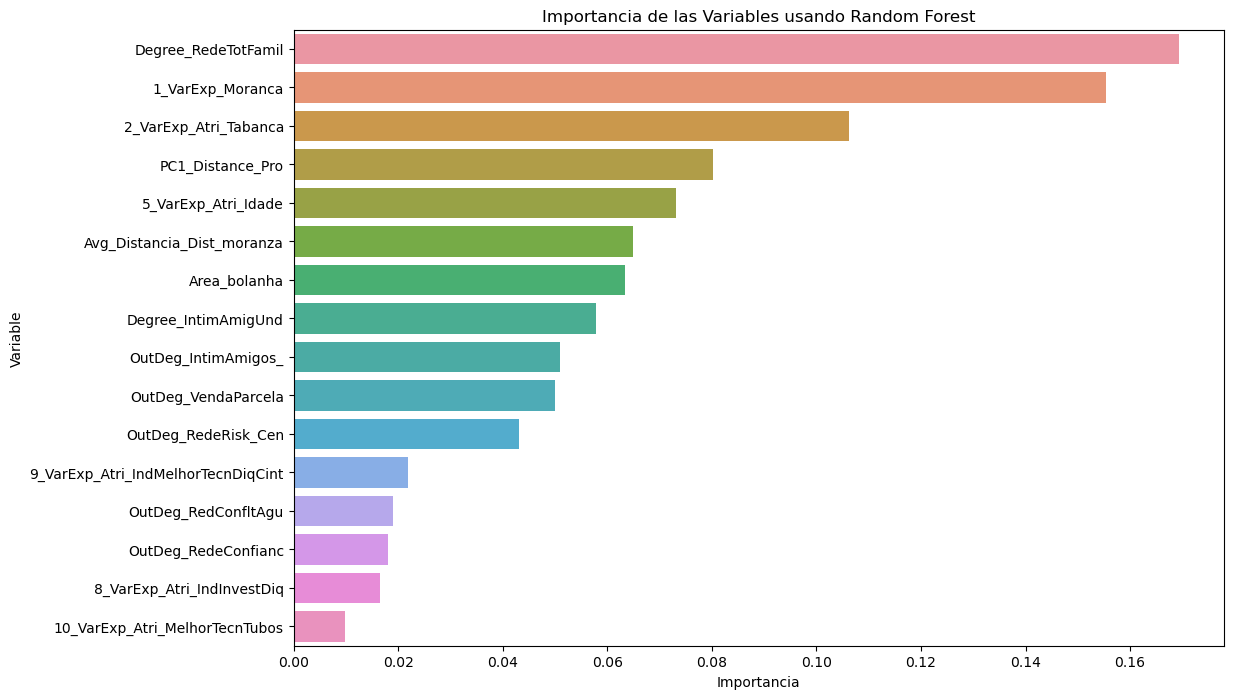

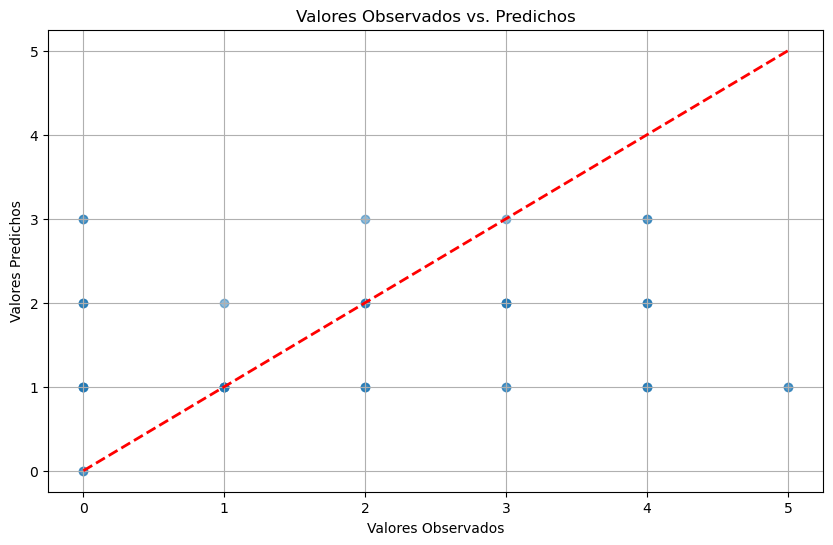

In [41]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Obtain MSE
mse = mean_squared_error(y_test, y_pred_test)

# Calculate R^2 manually (this sibling value should be the correct one)
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) * (y_test - y_mean))
ss_residual = np.sum((y_test - y_pred_test) * (y_test - y_pred_test))
r2 = 1 - (ss_residual / ss_total)

n = len(y_test)
p = X_test_scaled.shape[1]

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Obtain the importances of the variables. 
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=importance_df)
plt.title('Importancia de las Variables usando Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# Crear un gráfico de Valores Observados vs. Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. Predichos')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()


In [42]:
resultados_df = pd.DataFrame({
    'Valores Observados': y_test,
    'Valores Predichos': y_pred_test
})

# Directory
ruta_archivo = '../Pruebas/resultados_observados_vs_predichos.xlsx'
resultados_df.to_excel(ruta_archivo, index=False)
print(f"Valores observados y predichos guardados en {ruta_archivo}")

Valores observados y predichos guardados en ../Pruebas/resultados_observados_vs_predichos.xlsx


In [43]:
# Define the output directory
output_path_importances = "../Results/importances.csv"
os.makedirs("../Results/", exist_ok=True)

# Save the 10 highest interactions in a CSV file
importance_df.to_csv(output_path_importances, index=True)

In [44]:
from sklearn.inspection import partial_dependence

variables = X.columns

# Compute the importance and direction of interactions
interaction_importances = []

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        pdp = partial_dependence(rf, X_train_scaled, features=[i, j], kind="average")
        pdp_values = pdp['average'][0]
        
        # Calculate the importance of the interaction
        interaction_importance = np.mean(np.abs(pdp_values - pdp_values.mean()))
        
        # Calculate the direction of the interaction
        direction = np.mean(np.diff(pdp_values, axis=0))
        
        interaction_importances.append(((variables[i], variables[j]), interaction_importance, direction))

# Sort interactions by importance
interaction_importances = sorted(interaction_importances, key=lambda x: x[1], reverse=True)
interaction_importance_df = pd.DataFrame(interaction_importances, columns=['Interaction', 'Importance', 'Direction'])


In [45]:
# Show top 10 interactions
interaction_importance_df.head(10)

,Interaction,Importance,Direction
0,"(Degree_RedeTotFamil, 1_VarExp_Moranca)",0.487777,0.063052
1,"(OutDeg_RedeRisk_Cen, Degree_RedeTotFamil)",0.462140,0.009512
2,"(Degree_RedeTotFamil, 5_VarExp_Atri_Idade)",0.461521,0.065267
3,"(Avg_Distancia_Dist_moranza, Degree_RedeTotFamil)",0.445997,0.002290
4,"(PC1_Distance_Pro, Degree_RedeTotFamil)",0.441340,0.000281
5,"(OutDeg_RedConfltAgu, Degree_RedeTotFamil)",0.439968,0.069523
6,"(Degree_RedeTotFamil, Area_bolanha)",0.439573,0.061674
7,"(Degree_RedeTotFamil, 10_VarExp_Atri_MelhorTec...",0.438637,0.061211
8,"(OutDeg_RedeConfianc, Degree_RedeTotFamil)",0.437893,0.013212
9,"(Degree_IntimAmigUnd, Degree_RedeTotFamil)",0.437462,0.008337


In [46]:
# Sort the DataFrame by the column of importance in descending order
interaction_importance_df_sorted = interaction_importance_df.sort_values(by='Importance', ascending=False)

# Select the 10 highest interactions
top_10_interactions = interaction_importance_df_sorted.head(10)

# Define the output path
output_path = "../Results/interactions_modeled.csv"
os.makedirs("../Results/", exist_ok=True)

# Save the 10 highest interactions in a CSV file
try:
    top_10_interactions.to_csv(output_path, index=True)
    print(f"Archivo guardado exitosamente en {output_path}.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")

Archivo guardado exitosamente en ../Results/interactions_modeled.csv.


In [47]:
# Combinar predicciones de entrenamiento y prueba para todo el conjunto de datos
y_pred_all = np.concatenate([y_pred_train, y_pred_test])
y_all = np.concatenate([y_train, y_test])

In [48]:
# Calculate performance metrics
mse = mean_squared_error(y_all, y_pred_all)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_all, y_pred_all)
r2 = r2_score(y_all, y_pred_all)
pearson_corr, _ = pearsonr(y_all, y_pred_all)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Pearson Correlation: {pearson_corr:.4f}")


Mean Squared Error (MSE): 1.1395
Root Mean Squared Error (RMSE): 1.0675
Mean Absolute Error (MAE): 0.5969
R^2 Score: 0.4999
Pearson Correlation: 0.7156


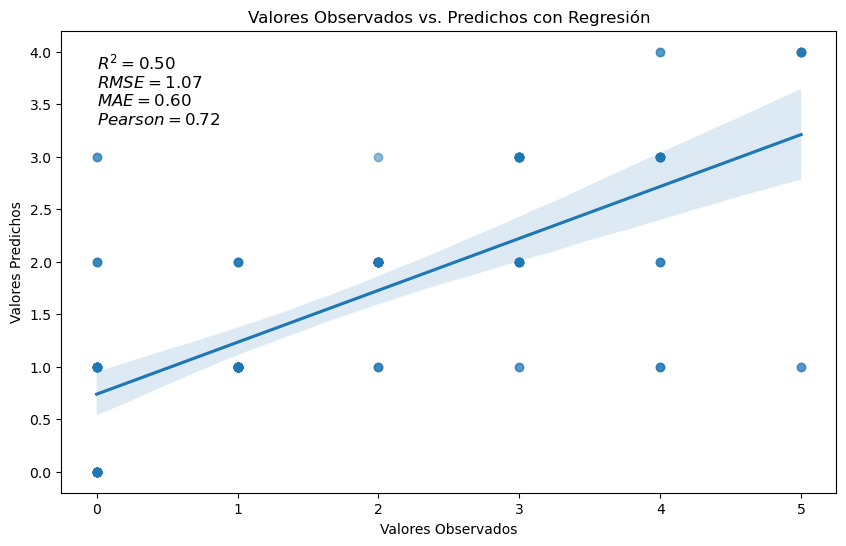

In [49]:
# To create a graph of Observed vs. Predicted Values with regression
plt.figure(figsize=(10, 6))
sns.regplot(x=y_all, y=y_pred_all, scatter_kws={'alpha':0.5})
# plt.plot([min(y_all), max(y_all)], [min(y_all), max(y_all)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. Predichos con Regresión')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.text(min(y_all), max(y_pred_all), f'$R^2 = {r2:.2f}$\n$RMSE = {rmse:.2f}$\n$MAE = {mae:.2f}$\n$Pearson = {pearson_corr:.2f}$', fontsize=12, verticalalignment='top')
plt.grid(False)
plt.show()




### Now we will run all in one loop and store the results in one csv file. 

In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from openpyxl import Workbook

In [51]:
dep_variables_no_ceros.head()
# Definir la variable dependiente y las variables independientes
X = indep_variables_no_ceros.drop(columns=['id'])
y = dep_variables_no_ceros.drop(columns=['id'])


In [52]:
# This process continues using the above filter of independent variables.
X

,OutDeg_RedConfltAgu,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,OutDeg_VendaParcela,PC1_Distance_Pro,Avg_Distancia_Dist_moranza,Degree_RedeTotFamil,1_VarExp_Moranca,2_VarExp_Atri_Tabanca,5_VarExp_Atri_Idade,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,1,5,2,2,1,0,3421.335739,1196.167221,0,2,2,38,4,9,0,1.9217
1,0,1,1,4,1,1,4831.628298,1197.004693,4,2,2,66,4,0,0,1.8387
2,0,3,2,2,1,0,5504.010082,1109.258987,5,2,2,57,2,1,0,1.6564
3,0,9,8,5,4,0,1408.571633,1318.835021,5,2,2,52,5,5,0,2.6717
4,0,8,3,6,3,0,-659.695967,1647.810169,5,2,2,50,5,19,2,2.2281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,17,13,0,4,0,673.137945,3060.351098,0,42,1,39,4,5,1,0.3036
125,0,4,2,0,1,0,966.173193,3068.550714,2,42,1,53,2,1,0,0.1771
126,0,4,4,0,1,0,10281.694613,1726.208072,0,42,1,35,3,0,0,0.7046
127,0,3,0,0,2,0,122.292322,2785.508626,2,42,1,46,3,2,1,0.9873


In [53]:
y

,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,12,1,2,2,0,2,2,0,4,4,0
1,12,3,1,1,0,3,3,6,7,7,0
2,12,1,1,1,2,3,1,2,4,4,0
3,12,1,1,2,4,9,9,18,18,18,0
4,12,2,2,3,3,4,4,5,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...
124,19,3,0,0,0,4,4,0,8,8,0
125,19,0,1,0,0,2,1,0,3,3,0
126,19,1,1,1,0,0,0,0,0,0,0
127,19,2,1,1,0,2,1,0,3,3,0


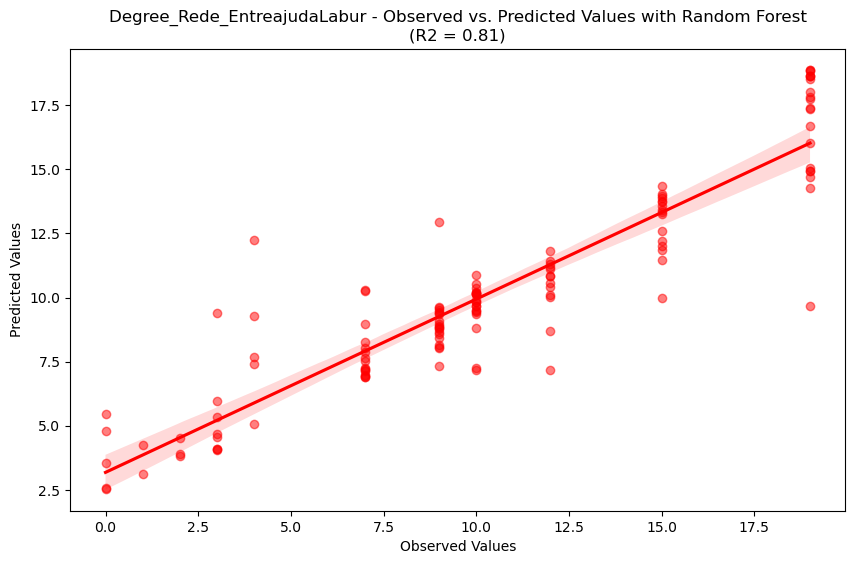

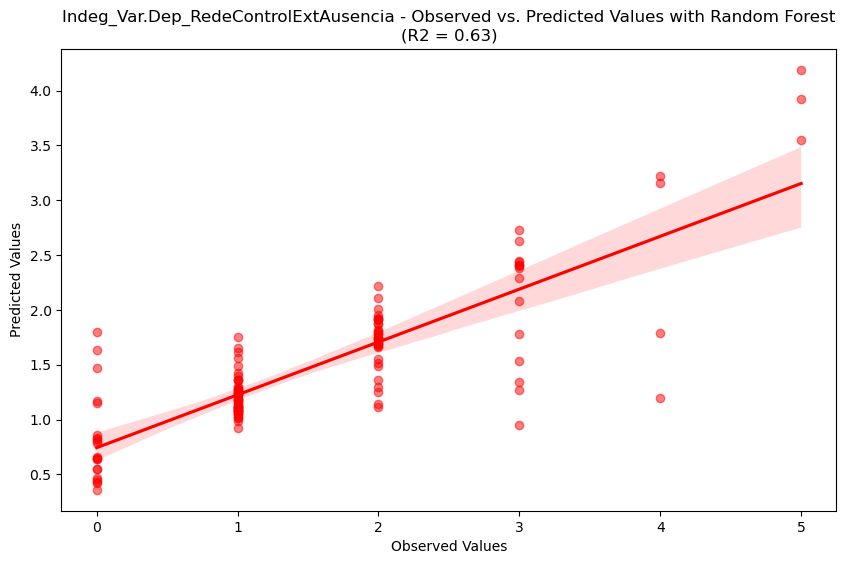

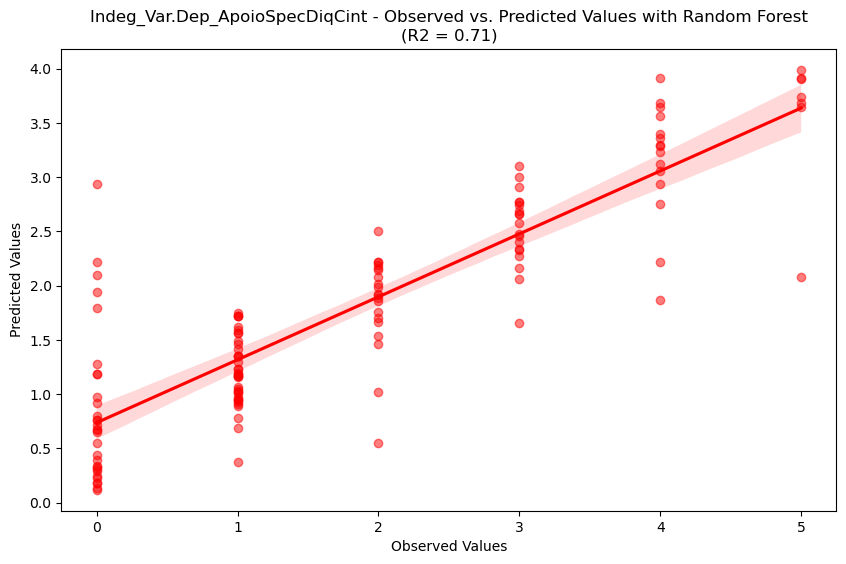

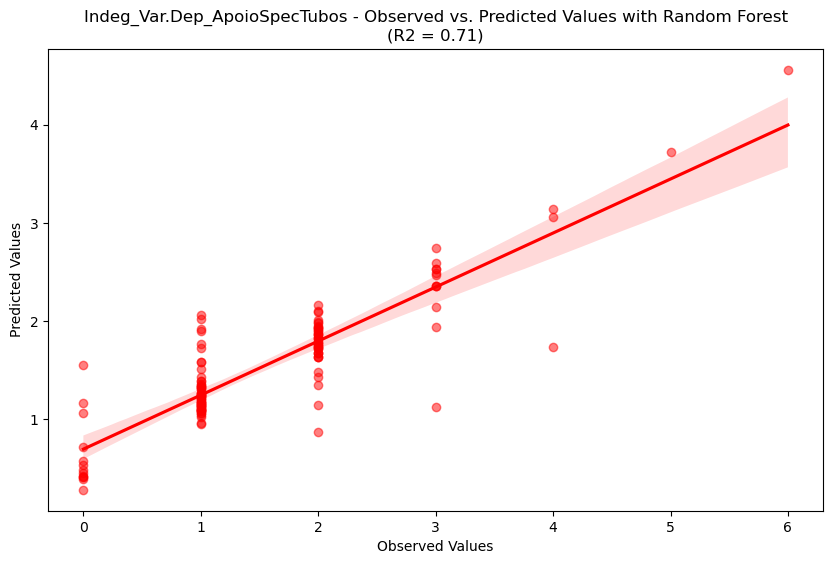

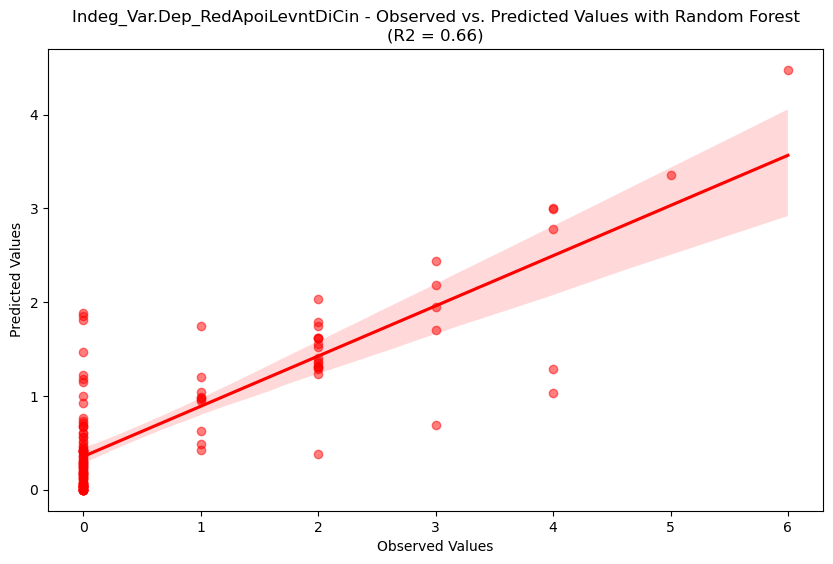

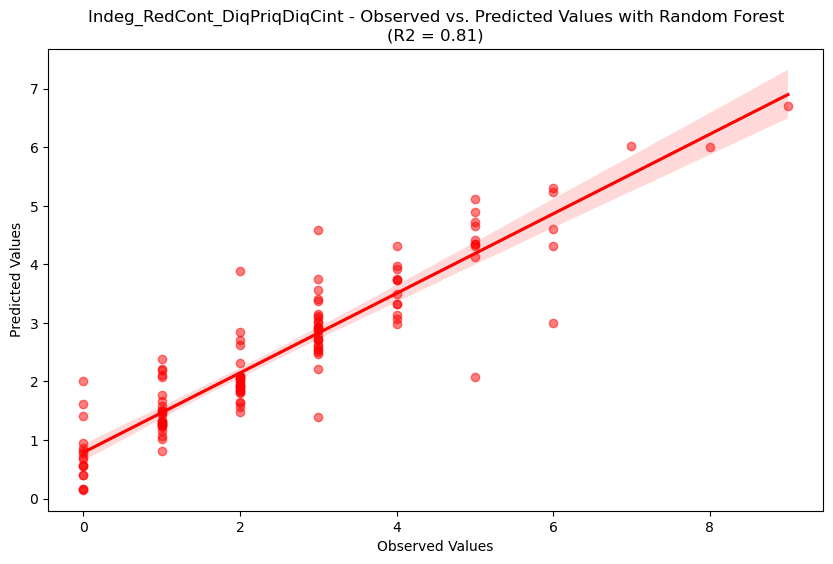

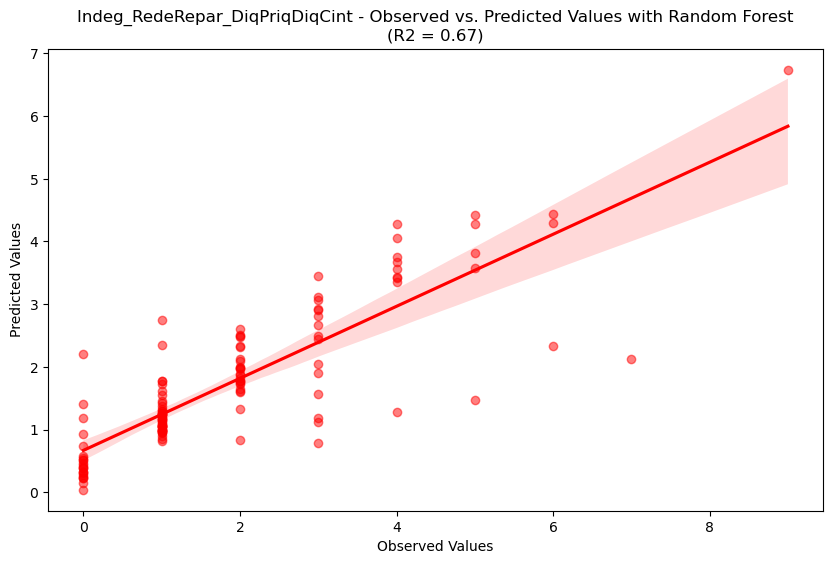

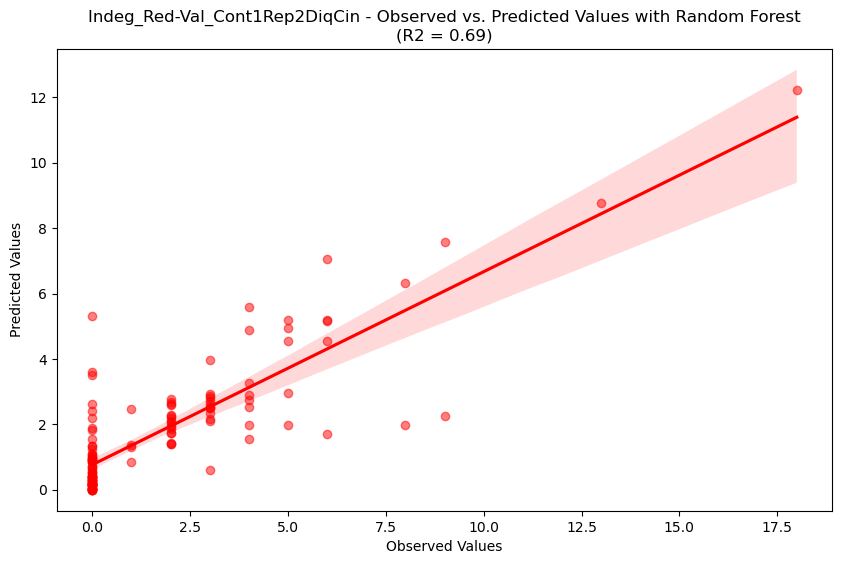

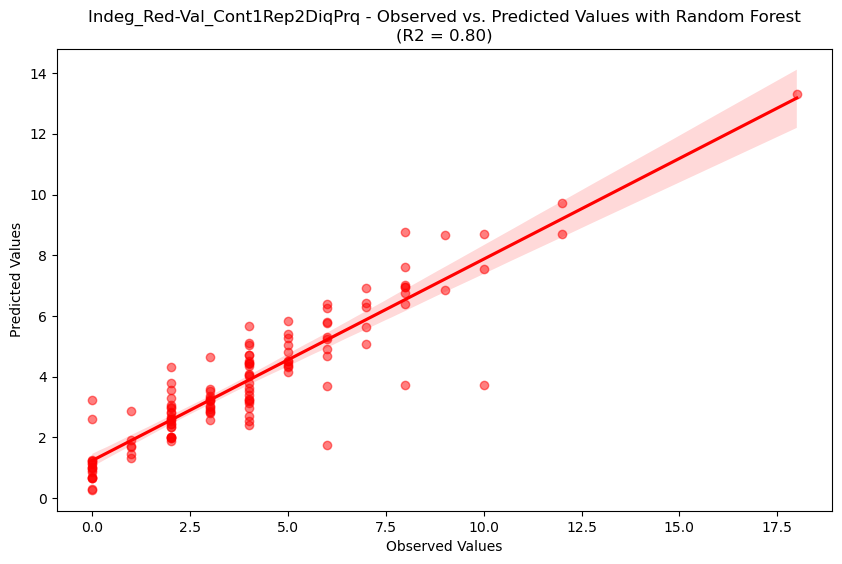

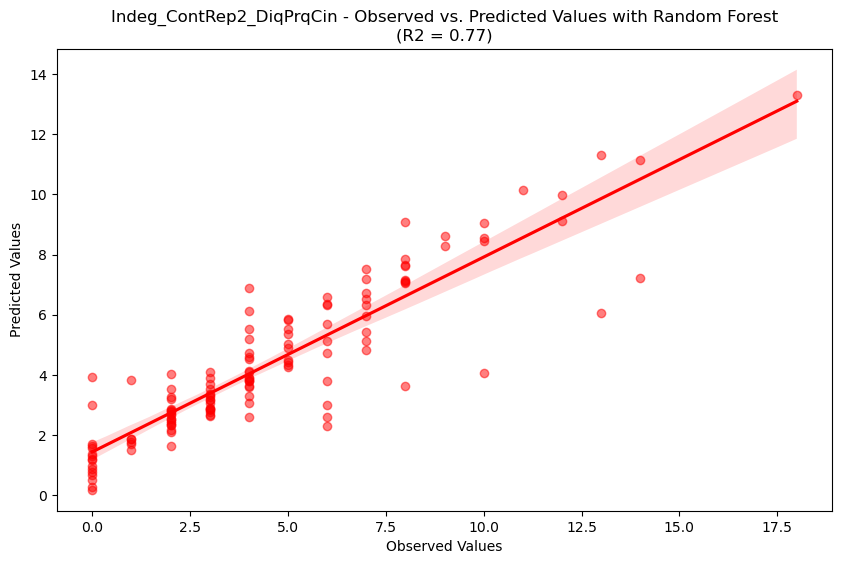

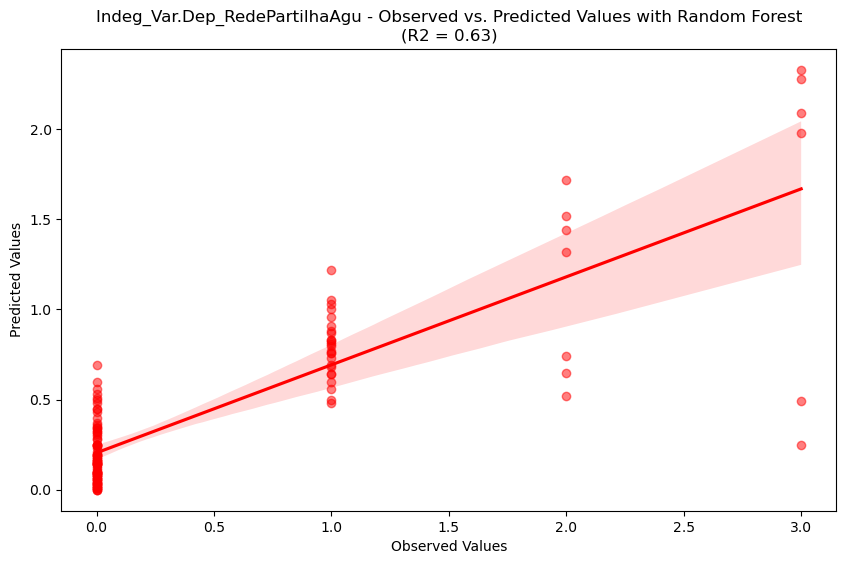

In [54]:
# Dictionaries to store results
results_test = []
results_all = []
selected_variables = []

# Iterate over each dependent variable
for col in y.columns:
    # Select the specific dependent variable
    y_col = y[col]
    
    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_col, test_size=0.2, random_state=42)
    
    # Scale the independent variables for training and testing
    scaler_train = StandardScaler()
    X_train_scaled = scaler_train.fit_transform(X_train)
    X_test_scaled = scaler_train.transform(X_test)
    
    # Create the Random Forest model and train it with the training data
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Make predictions with the testing data
    y_pred_test = rf.predict(X_test_scaled)
    
    # Calculate performance metrics with the testing data
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    # Save results for the testing data
    results_test.append({
        'Dependent Variable': col,
        'R2 Test Data': r2_test,
        'RMSE Test Data': rmse_test,
        'MAE Test Data': mae_test
    })
    
    # Make predictions with all data (training + testing)
    X_scaled = scaler_train.transform(X)  # Scale all independent variables
    y_pred_all = rf.predict(X_scaled)
    
    # Calculate performance metrics with all data
    r2_all = r2_score(y_col, y_pred_all)
    mse_all = mean_squared_error(y_col, y_pred_all)
    rmse_all = np.sqrt(mse_all)
    mae_all = mean_absolute_error(y_col, y_pred_all)
    
    # Save results for all data
    results_all.append({
        'Dependent Variable': col,
        'R2 All Data': r2_all,
        'RMSE All Data': rmse_all,
        'MAE All Data': mae_all
    })
    
    # If the R2 score with all data is greater than 0.20, save the variable name
    if r2_all > 0.20:
        selected_variables.append(col)
        
        # Create a plot of observed vs predicted values using sns.regplot
        plt.figure(figsize=(10, 6))
        sns.regplot(x=y_col, y=y_pred_all, scatter_kws={'alpha':0.5}, color='red')
        plt.title(f'{col} - Observed vs. Predicted Values with Random Forest\n(R2 = {r2_all:.2f})')
        plt.xlabel('Observed Values')
        plt.ylabel('Predicted Values')
        plt.grid(False)
        plt.show()


In [56]:
# Convert the results to DataFrames
results_test_df = pd.DataFrame(results_test)
results_all_df = pd.DataFrame(results_all)

# Saving the results in Excel files
wb = Workbook()

# Results sheet with test data
ws_test = wb.active
ws_test.title = "Random Forest Results Test Data"
ws_test.append(['Dependent Variable', 'R2 Test Data', 'RMSE Test Data', 'MAE Test Data'])
for row in results_test:
    ws_test.append([row['Dependent Variable'], row['R2 Test Data'], row['RMSE Test Data'], row['MAE Test Data']])

# Results sheet with all data
ws_all = wb.create_sheet(title="Random Forest Results All Data")
ws_all.append(['Dependent Variable', 'R2 All Data', 'RMSE All Data', 'MAE All Data'])
for row in results_all:
    ws_all.append([row['Dependent Variable'], row['R2 All Data'], row['RMSE All Data'], row['MAE All Data']])
# Save the Excel file
wb.save('../Results/random_forest_results.xlsx')
